#### Description
A fictional company has had one product that was launched a long time ago. The data used here has entries of sales for this product for each day. A new product was launched in the company recently and its sales for each day have been recorded. The sales for each product will be stored in two variables product1 and product2 respectively.<br>
This is an analysis on the basis of the two lists.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

In [5]:
# Loading data
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

**Central Tendency Measures**<br>
Calculation of mean, median, mode for both lists (product1, product2)

In [6]:
mean1 = np.mean(product1)
mean2 = np.mean(product2)

med1 = np.median(product1)
med2 = np.median(product2)

mod1 = statistics.mode(product1)
mod2 = statistics.mode(product2)

print(mean1, mean2, med1, med2, mod1, mod2)

199.103 193.5 198.5 194.5 186 227


Since mode is not often representative for sizable datasets, we can ignore it for comparing the sales of the products. From the remaining two measures (mean and median) we can see that product1 brings in more sales.

**Measure of Data Variation**<br>
Calculating standard deviation

In [7]:
std1 = np.std(product1)
std2 = np.std(product2)
print(std1, std2)

28.793964489107783 29.589018233121557


The evaluation of measures for product1 are slightly more accurate.

**Sales Distribution**<br>
Sales probability distribution visualization for both products.

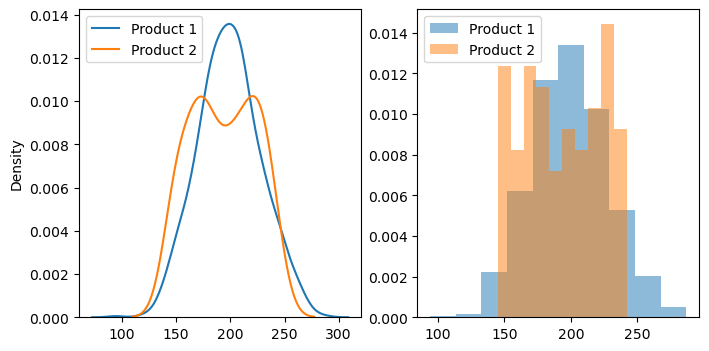

In [8]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.kdeplot(product1,label = 'Product 1')
sns.kdeplot(product2, label = 'Product 2')
plt.legend()
plt.subplot(1,2,2)
plt.hist(product1,density=True,alpha=0.5,label = 'Product 1')
plt.hist(product2,density=True,alpha=0.5,label = 'Product 2')
plt.legend()
plt.show()

**Range**<br>
Calculating range for both products.

In [47]:
range1 = np.max(product1) - np.min(product1)
range2 = np.max(product2) - np.min(product2)
print(range1, range2)

193 97


The ranges diverges, which can be explained by the bimodal distribution for product2 given its standard deviation is comparable with product1.

**IQR**<br>
Calculating the interquartile range for both products and getting rid of outliers.

In [9]:
iqr1 = np.percentile(product1,75) - np.percentile(product1,25)
iqr2 = np.percentile(product2,75) - np.percentile(product2,25)
print(iqr1,iqr2)

38.25 51.0


In [10]:
upper1 = np.percentile(product1,75) + iqr1*1.5
lower1 = np.percentile(product1,25) - iqr1*1.5
upper2 = np.percentile(product2,75) + iqr2*1.5
lower2 = np.percentile(product2,25) - iqr2*1.5
p1 = [i for i in product1 if (i > lower1 and i < upper1)]
p2 = [i for i in product2 if (i > lower2 and i < upper2)]

In [11]:
range1 = np.max(p1) - np.min(p1)
range2 = np.max(p2) - np.min(p2)
print(range1, range2)

151 97


After this operation the range of product1 has become lower that is it had outliers to start with.

**Box-plots**<br>
Box-plots to visualize before and after for product1

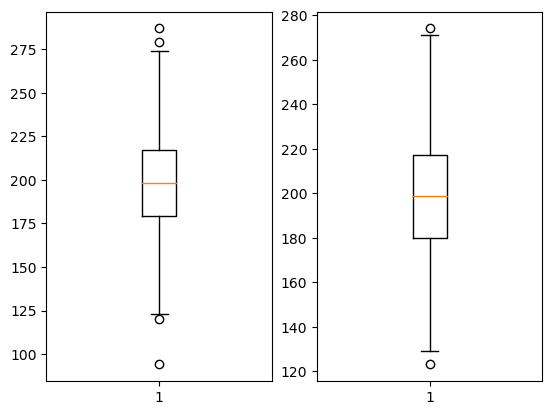

In [12]:
plt.subplot(1,2,1)
plt.boxplot(product1)
plt.subplot(1,2,2)
plt.boxplot(p1)
plt.show()

The effect of outliers has been reduced.

**QQ Plots**<br>
Getting QQ plots for both products to see if their distribution is normal.

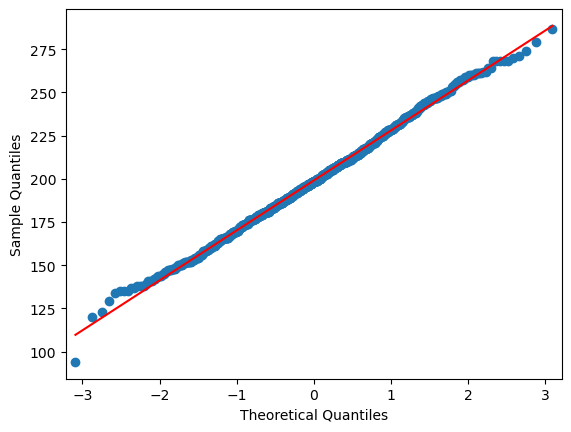

In [13]:
sm.qqplot(np.array(product1),line='r')
plt.show()

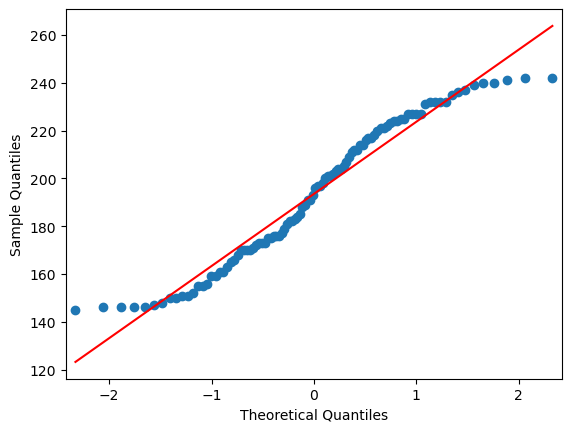

In [14]:
sm.qqplot(np.array(product2),line='r')
plt.show()

The first product has a normal distribution, whereas the second product does not. The latter has too many values where the line is above actual values (150 - 190 and 240 - ) and too few values where the line is below the actual values ( - 140 and 200 - 220)

**Standard Distribution**<br>
Converting values for product1 (which has a normal distribution) into standard normal distribution using current mean and std values.

In [20]:
# New variable with new values
std_prod1 = (np.array(product1) - mean1) / std1

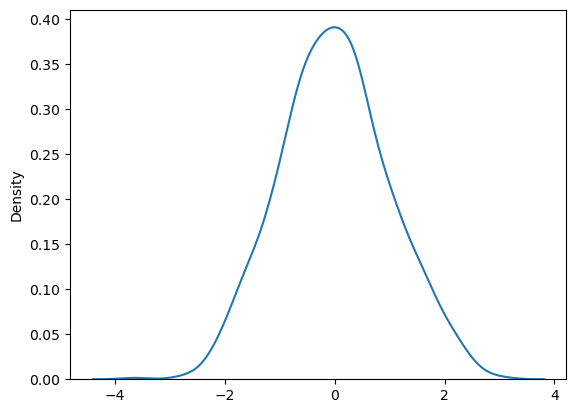

In [16]:
# kdeplot of the new standard distribution
sns.kdeplot(std_prod1)
plt.show()

**Product2 Data**<br>

In [19]:
# Point estimation of the mean of product2
mean2

193.5

In [22]:
# Calculating the 95% confidence interval
mean_err2 = np.std(product2, ddof=1) / np.sqrt(len(product2))
ul = norm.ppf(0.975, mean2, mean_err2)
ll = norm.ppf(0.025, mean2, mean_err2)
print(ul, ll)

199.3285570161026 187.6714429838974


**AB Test**<br>
Performing a two-tailed AB test with a significance level of 5% that mean sales of product1 and product2 are equal

In [27]:
test_mean = np.mean(product2)
control_mean = np.mean(product1)

test_std = np.std(product2,ddof=1)
control_std = np.std(product1,ddof=1)

test_size = len(product1)
control_size = len(product2)

dof = test_size + control_size - 2

err_diff = np.sqrt(test_std**2/test_size + control_std**2/control_size)
diff_mean = test_mean - control_mean

t_stat = diff_mean / err_diff
print(t_stat)

-1.8489054152532978


In [28]:
t.cdf(t_stat,dof)

0.032370071628985184

In [29]:
t025,t975 = t.ppf([0.025,0.975],dof)

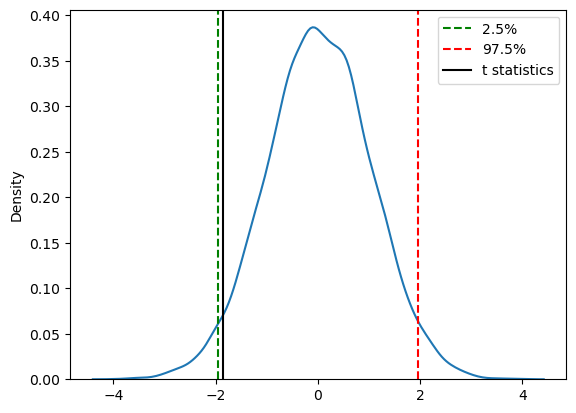

In [30]:
np.random.seed()
demo_data = np.random.standard_t(dof,10000)
sns.kdeplot(demo_data)

plt.axvline(t025,ls='--',color='g',label='2.5%')
plt.axvline(t975,ls='--',color='r',label='97.5%')

plt.axvline(t_stat,ls='-',color='black',label='t statistics')

plt.legend()
plt.show()

Our value is larger than the significance level. Thus, we can not discard the null hypothesis. Mean sales could be equal.